**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd=pd.read_csv('dailyActivity_merged.csv')

**Check the structure of the DataFrame:**

In [3]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

**Summary statistics:**

In [4]:
pd.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


**Handling Missing Values:**

In [5]:
print(pd.isnull().sum())


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


**Handling Duplicates:**

In [6]:
print("Number of duplicate rows:", pd.duplicated().sum())


Number of duplicate rows: 0


**Visualize Daily Activity Trends:**

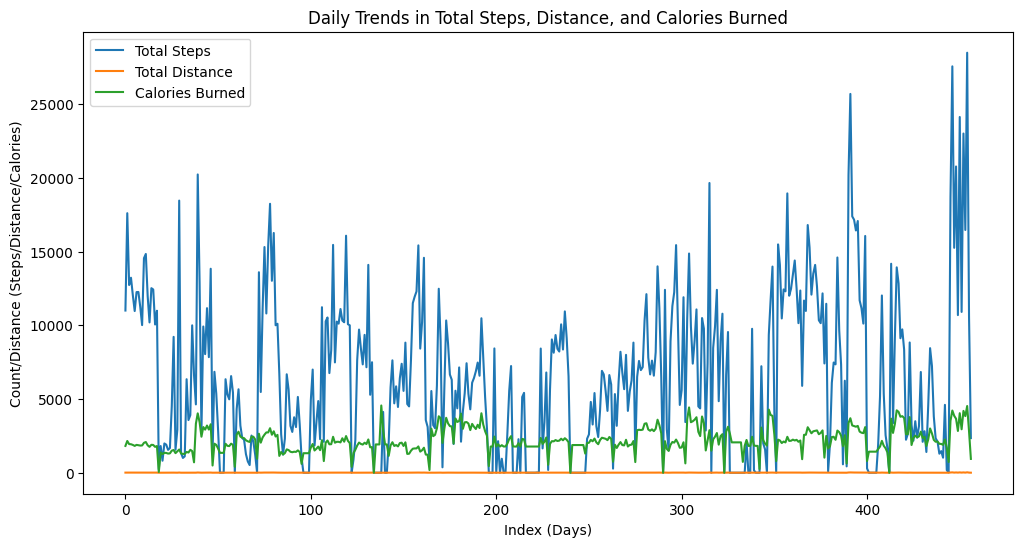

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(pd.index, pd['TotalSteps'], label='Total Steps')
plt.plot(pd.index, pd['TotalDistance'], label='Total Distance')
plt.plot(pd.index, pd['Calories'], label='Calories Burned')
plt.xlabel('Index (Days)')
plt.ylabel('Count/Distance (Steps/Distance/Calories)')
plt.title('Daily Trends in Total Steps, Distance, and Calories Burned')
plt.legend()
plt.show()


**correlation analysis between different activity metrics**

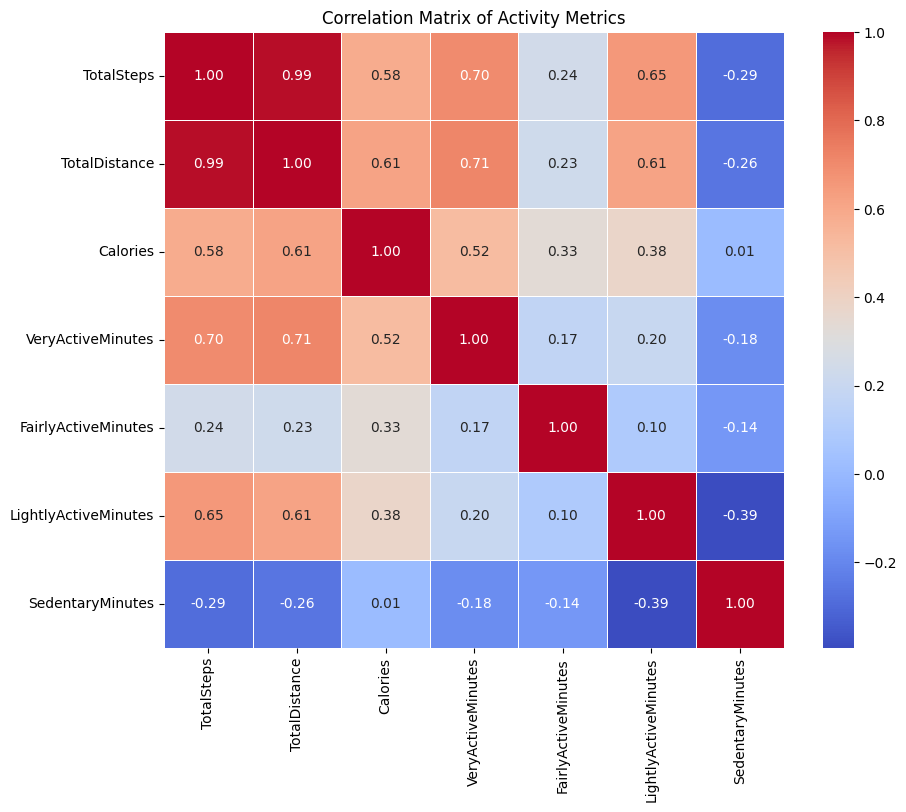

Correlation Matrix:
                      TotalSteps  TotalDistance  Calories  VeryActiveMinutes  \
TotalSteps              1.000000       0.986789  0.581380           0.699699   
TotalDistance           0.986789       1.000000  0.613647           0.714320   
Calories                0.581380       0.613647  1.000000           0.518905   
VeryActiveMinutes       0.699699       0.714320  0.518905           1.000000   
FairlyActiveMinutes     0.238389       0.230712  0.334550           0.167764   
LightlyActiveMinutes    0.654418       0.614152  0.377249           0.199697   
SedentaryMinutes       -0.285258      -0.260301  0.011824          -0.177652   

                      FairlyActiveMinutes  LightlyActiveMinutes  \
TotalSteps                       0.238389              0.654418   
TotalDistance                    0.230712              0.614152   
Calories                         0.334550              0.377249   
VeryActiveMinutes                0.167764              0.199697   
Fair

In [8]:

correlation_matrix = pd[['TotalSteps', 'TotalDistance', 'Calories', 'VeryActiveMinutes',
                                  'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Activity Metrics')
plt.show()


print("Correlation Matrix:")
print(correlation_matrix)


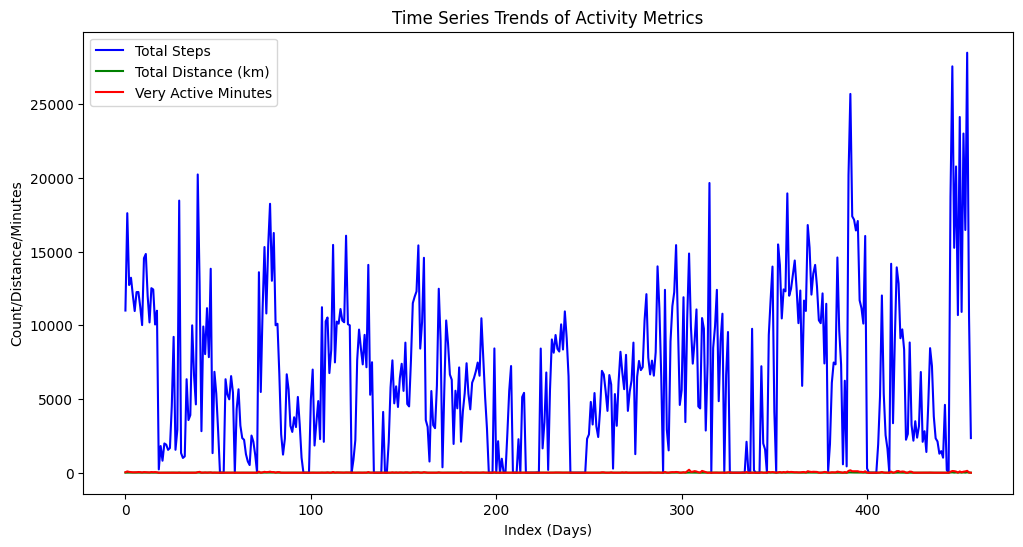

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(pd.index, pd['TotalSteps'], label='Total Steps', color='blue')
plt.plot(pd.index, pd['TotalDistance'], label='Total Distance (km)', color='green')
plt.plot(pd.index, pd['VeryActiveMinutes'], label='Very Active Minutes', color='red')
plt.xlabel('Index (Days)')
plt.ylabel('Count/Distance/Minutes')
plt.title('Time Series Trends of Activity Metrics')
plt.legend()
plt.show()


**predective modelling**

In [10]:
from sklearn.model_selection import train_test_split

# Select features (input variables) and target variable (output variable)
features = pd[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes']]
target = pd['Calories']  # Predicting Calories burned based on activity metrics

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (365, 3) (365,)
Testing set shape: (92, 3) (92,)


**next steps are model selection, training, evaluation, and prediction.**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Model Selection
model = LinearRegression()

# Step 2: Model Training
model.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 295828.911995339
Root Mean Squared Error (RMSE): 543.9015646193151
R-squared (R2) Score: 0.5357252411548444


**hypothetical-data**

In [13]:
import pandas as pd

# Generate hypothetical data for prediction
hypothetical_data = pd.DataFrame({
    'TotalSteps': [8000, 10000, 12000],  # Hypothetical values for TotalSteps
    'TotalDistance': [6.5, 8.0, 9.5],     # Hypothetical values for TotalDistance (in km)
    'VeryActiveMinutes': [30, 45, 60]     # Hypothetical values for VeryActiveMinutes
})

# Make predictions using the trained model
predicted_calories = model.predict(hypothetical_data)

# Print the predicted calories
print("Predicted Calories (hypothetical data):", predicted_calories)



Predicted Calories (hypothetical data): [2555.77645573 2755.06818837 2954.35992101]


**Analysis of Prediction Results:**

In [14]:
# Compare predicted vs. actual values
comparison_df = pd.DataFrame({'Actual Calories': y_test, 'Predicted Calories': y_pred})
print(comparison_df.head())

# Calculate prediction error
prediction_error = y_test - y_pred
print("\nPrediction Error:")
print(prediction_error.head())


     Actual Calories  Predicted Calories
304             4430         3499.733907
39              4029         3182.735266
341             1820         1715.395084
218             1776         1715.395084
155             1630         2386.865048

Prediction Error:
304    930.266093
39     846.264734
341    104.604916
218     60.604916
155   -756.865048
Name: Calories, dtype: float64


**spread and variability of errors in the predictions**

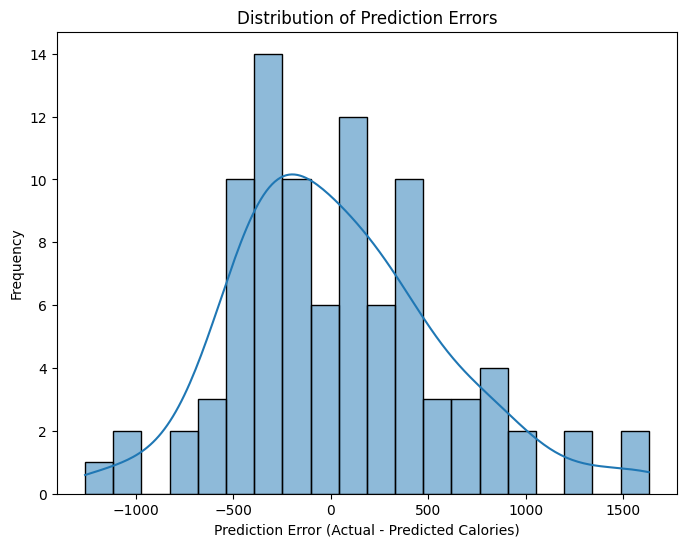

In [15]:
import seaborn as sns

# Visualize distribution of prediction errors
plt.figure(figsize=(8, 6))
sns.histplot(prediction_error, bins=20, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Actual - Predicted Calories)')
plt.ylabel('Frequency')
plt.show()


**centrality of errors**

In [16]:
# Calculate mean and median of prediction errors
mean_error = prediction_error.mean()
median_error = prediction_error.median()

print("Mean Prediction Error:", mean_error)
print("Median Prediction Error:", median_error)


Mean Prediction Error: 39.138139581347524
Median Prediction Error: -44.810622529911825
